![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [5]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [6]:
#Exploring the dataframe
print(penguins_df.info())

#Looking for null values
print(penguins_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [7]:
#Creating mappings for the sex column
mappings = {'MALE':1,'FEMALE':0}

#Applying the mapping on the sex column
penguins_df['sex'] = penguins_df['sex'].map(mappings)

#Examining the result 
print(penguins_df['sex'].value_counts())


sex
1    167
0    165
Name: count, dtype: int64


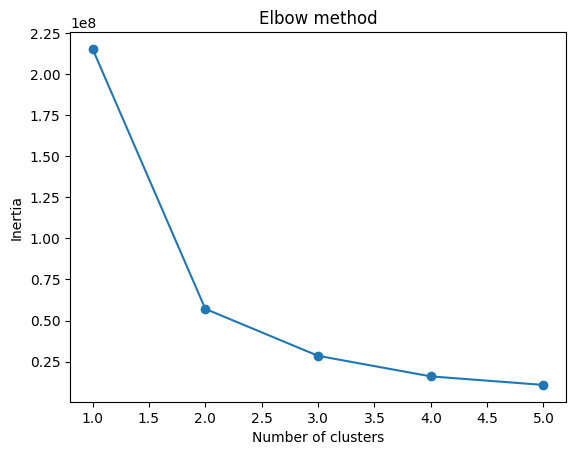

In [10]:
#Lets see what amount of features we should use for our KMeans Model
inertias = []

for i in range(1,6):
    model = KMeans(n_clusters=i)
    model.fit(penguins_df)
    inertias.append(model.inertia_)

plt.plot(range(1,6), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#3 components is the perfect amount of clusters. The rate at which the inertia reduces declines slowly after 3 clusters.

#CREATING A PIPELINE TO SCALE AND THEN FIT A KMEANS MODEL WITH 3 COMPONENTS
steps = make_pipeline(StandardScaler(), KMeans(n_clusters=3))

#Applying the pipeline on the data
steps.fit(penguins_df)

#Predicting the cluster labels
cluster_labels = steps.predict(penguins_df)

#Assigning the labels to the dataframe
penguins_df['clusters'] = cluster_labels

#Creating the result dataframe
stat_penguins = penguins_df.groupby('clusters')[
    ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
].mean()

print(stat_penguins)

          culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
clusters                                                                   
0                40.217757        17.611215         189.046729  3419.158879
1                43.878302        19.111321         194.764151  4006.603774
2                47.568067        14.996639         217.235294  5092.436975
